In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [2]:
import matplotlib
matplotlib.style.use('publication23')

In [3]:
qrange = linspace(0, 5, 251)
omrange = linspace(-5, 5, 501)

In [4]:
pQ = Particle(0.6, qrange, omrange, eps=1e-2)
pG = Particle(1.4, qrange, omrange, stat='b')


In [5]:
T = 0.01

In [6]:
chQ = Channel(pQ, pQ, T)

XQ = array([tm.x_solve(o, 0, 0, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange])

vQ = np.sign(chQ.G)*chQ.v(0)**2
TQ = - 4*np.pi*vQ / (1 - XQ)

In [7]:
# chQ.populate_T()

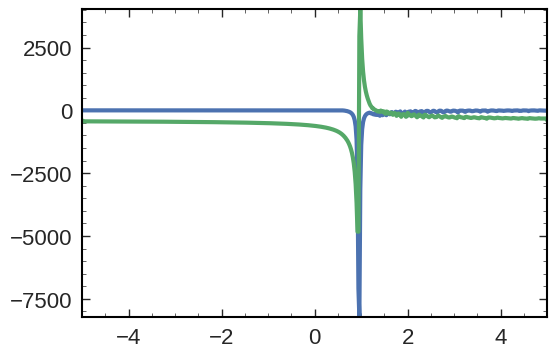

In [8]:
# plt.plot(omrange, imag(chQ.TM[:, 0]))
plt.plot(omrange, imag(TQ))
plt.plot(omrange, real(TQ))
# plt.xlim(0, 1.5)

In [9]:
chG = Channel(pG, pG, T)

In [10]:
chG.populate_T()

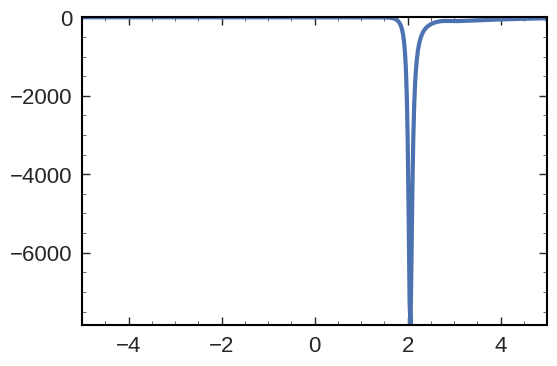

In [11]:
plt.plot(omrange, imag(chG.TM[:, 0]))

In [12]:
XG = array([tm.x_solve(o, 0, 0, T, chG.iVS[0], chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange])

In [13]:
vG = np.sign(chG.G)*chG.v(0)**2
TG = - 4*np.pi*vG / (1 - XG)

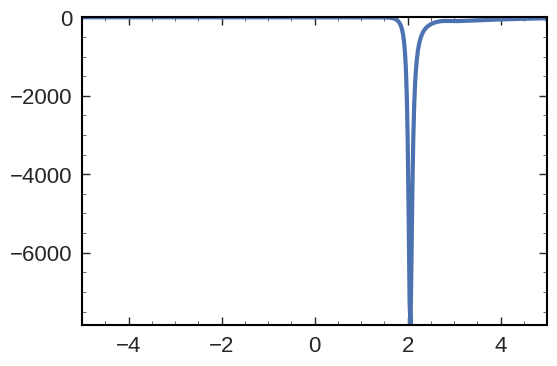

In [14]:
plt.plot(omrange, imag(TG))

In [15]:
Grange = linspace(8, 18, 55)

## Iterate over parameter space

In [175]:
screen = 0.055

In [176]:
mG = 1.4
mQ = 0.6

In [177]:
pQ = Particle(mQ, qrange, omrange)
pG = Particle(mG, qrange, omrange, stat='b', d=16)

In [178]:
import tqdm

In [179]:
mQQs = []
mGGs = []

In [180]:
L = 0.5
G = 5

In [181]:
Lrange = linspace(0.25, 0.5, 25)

In [182]:
mQQss = []
mGGss = []
mDss = []

chQ = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=G, L=L, screen=screen)
chG = Channel(pG, pG, T, ds=4, da=1, Fa=9./4, G=G, L=L, screen=screen)
chD = Channel(pQ, pQ, T, ds=4, da=3, Fa=1/2, G=G, L=L, screen=screen)

for L in tqdm.tqdm_notebook(Lrange):

    mQQ = 1
    mGG = 2.5
    mD = 1
    
    mQQs = []
    mGGs = []
    mDs = []
    
    for G in tqdm.tqdm_notebook(Grange, leave=0):
        for _ in [chQ, chG, chD]:
            _.set_Gs(G)
            _.L = L
            _.init_iV()
        
        omrange_test = linspace(-3.5, 3.5, 1000)
        
        XQ = array([tm.x_solve(o, 0, 0, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange_test])
        vQ = np.sign(chQ.G)*chQ.v(0)**2
        TQ = - 4*np.pi*vQ / (1 - XQ)
        
        XG = array([tm.x_solve(o, 0, 0, T, chG.iVS[0], chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange_test])
        vG = np.sign(chG.G)*chG.v(0)**2
        TG = - 4*np.pi*vG / (1 - XG)

        XD = array([tm.x_solve(o, 0, 0, T, chD.iVS[0], chD.iOm, chD.iReG2, chD.iImG2, 5, 1) for o in omrange_test])
        vD = np.sign(chD.G)*chD.v(0)**2
        TD = - 4*np.pi*vD / (1 - XD)
        
        from scipy.optimize import minimize
        
        iTQ = interp1d(omrange_test, imag(TQ), kind='cubic')
        iTG = interp1d(omrange_test, imag(TG), kind='cubic')
        iTD = interp1d(omrange_test, imag(TD), kind='cubic')
        
        mQQ = minimize(iTQ, mQQ, bounds=[[0, 2]]).x
        mGG = minimize(iTG, mGG, bounds=[[0., 2.5]]).x
        mD = minimize(iTD, mGG, bounds=[[0., 2.5]]).x
    
        mQQs += [mQQ]
        mGGs += [mGG]
        mDs += [mD]
        
    
    mQQss += [mQQs]
    mGGss += [mGGs]
    mDss += [mDs]

/tmp/ipykernel_320886/2198747079.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for L in tqdm.tqdm_notebook(Lrange):


  0%|          | 0/25 [00:00<?, ?it/s]

/tmp/ipykernel_320886/2198747079.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for G in tqdm.tqdm_notebook(Grange, leave=0):


  0%|          | 0/55 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [183]:
0.75

0.75

In [184]:
197/150

1.3133333333333332

In [185]:
j = 0
plt.plot(Grange, mQQss[j], label=r'$\bar q$q')
plt.plot(Grange, mGGss[j], ls='--', label='GG')
plt.plot(Grange, mDss[j], ls=':', label='qq')

print(Lrange[j])

plt.text(20, 2.3, r'$\Lambda$ = %.3f'%Lrange[j], fontsize=16)

plt.axhline(0.8, lw=1, ls=':', c='black')
plt.axhline(1.5, lw=1, ls=':', c='black')

i_x = np.argmin((array(mQQss[j]) - 0.8)**2)
plt.axvline(Grange[i_x], lw=1, ls='--', c='black')

# plt.ylim(0.7, 2.5)


plt.legend()
plt.title(r'$m_Q = %.3f, m_G = %.3f$'%(mQ, mG))

plt.savefig('mres_L=%.3f_mQ=%.3f_mG=%.3f.pdf'%(Lrange[j], mQ, mG), bbox_inches='tight')

IndexError: list index out of range

## Test a single $\Lambda$

In [16]:
Grange = linspace(1, 18, 55)

In [17]:
suppress = 0.8

In [26]:
L = 0.6
LG = suppress**2 * L

In [27]:
G = 14
screen = 0.00

In [28]:
mG = 1.358
mQ = 0.55

In [29]:
pQ = Particle(mQ, qrange, omrange)
pG = Particle(mG, qrange, omrange, stat='b', d=16)

In [30]:
T = 0.01

In [31]:
chQ = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=G, L=L, screen=screen)
chG = Channel(pG, pG, T, ds=4, da=1, Fa=9./4, G=G, L=suppress**2*L, screen=screen)
chD = Channel(pQ, pQ, T, ds=4, da=3, Fa=1/2, G=G, L=L, screen=screen) 

In [32]:
mQQ = 1
mGG = 2.5
mD = 1

mQQs = []
mGGs = []
mDs = []

mQQs_pole = []
mGGs_pole = []
mDs_pole = []

TQs = []
TGs = []
TDs = []

for G in tqdm.tqdm_notebook(Grange, leave=0):
    for _, L in zip([chQ, chG, chD], [L, LG, L]):
        _.set_Gs(G)
        _.L = L
        _.init_iV()
    
    omrange_test = linspace(0, 3.5, 1000)
    
    XQ = array([tm.x_solve(o, 0, 0, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange_test])
    vQ = np.sign(chQ.G)*chQ.v(0)**2
    TQ = - 4*np.pi*vQ / (1 - XQ)
    
    XG = array([tm.x_solve(o, 0, 0, T, chG.iVS[0], chG.iOm, chG.iReG2, chG.iImG2, 5, 1) for o in omrange_test])
    vG = np.sign(chG.G)*chG.v(0)**2
    TG = - 4*np.pi*vG / (1 - XG)

    XD = array([tm.x_solve(o, 0, 0, T, chD.iVS[0], chD.iOm, chD.iReG2, chD.iImG2, 5, 1) for o in omrange_test])
    vD = np.sign(chD.G)*chD.v(0)**2
    TD = - 4*np.pi*vD / (1 - XD)
    
    from scipy.optimize import minimize

    TQs += [TQ]
    TGs += [TG]
    TDs += [TD]
    
    iTQ = interp1d(omrange_test, imag(TQ), kind='cubic')
    iTG = interp1d(omrange_test, imag(TG), kind='cubic')
    iTD = interp1d(omrange_test, imag(TD), kind='cubic')

    
    
    # mQQ = minimize(iTQ, mQQ, bounds=[[0, 2]]).x
    mQQ = omrange_test[argmin(imag(TQ))]
    # mGG = minimize(iTG, mGG, bounds=[[0, 2.5]]).x
    mGG = omrange_test[argmin(imag(TG))]
    # mD = minimize(iTD, mGG, bounds=[[0, 2.5]]).x
    mD = omrange_test[argmin(imag(TD))]
    mQQs += [mQQ]
    mGGs += [mGG]
    mDs += [mD]

    i_pole = argmin((1 - real(XQ))**2)
    if abs(1 - real(XQ)[i_pole]) > 1e-1:
        mpole = None
    else:
        mpole = omrange_test[i_pole]
    mQQs_pole += [mpole]

    i_pole = argmin((1 - real(XG))**2)
    if abs(1 - real(XG)[i_pole]) > 1e-1:
        mpole = None
    else:
        mpole = omrange_test[i_pole]
    mGGs_pole += [mpole]

    i_pole = argmin((1 - real(XD))**2)
    if abs(1 - real(XD)[i_pole]) > 1e-1:
        mpole = None
    else:
        mpole = omrange_test[i_pole]
    mDs_pole += [mpole]

  0%|          | 0/55 [00:00<?, ?it/s]

Text(0.5, 1.0, '$m_Q = 0.550, m_G = 1.358$')

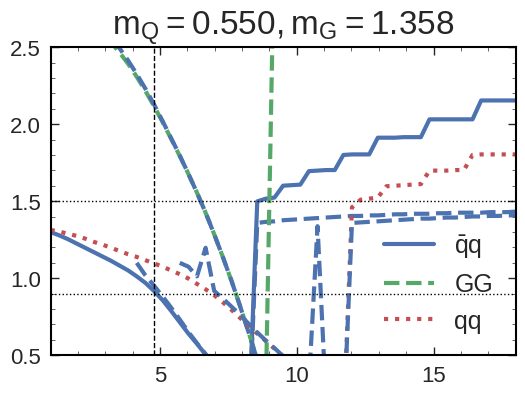

In [34]:
# j = 18
lq, = plt.plot(Grange, mQQs, label=r'$\bar q$q')
plt.plot(Grange, mQQs_pole, c=lq.get_c(), ls='--')
plt.plot(Grange, mGGs, ls='--', label='GG')
plt.plot(Grange, mGGs_pole, c=lq.get_c(), ls='--')
plt.plot(Grange, mDs, ls=':', label='qq')
plt.plot(Grange, mDs_pole, c=lq.get_c(), ls='--')


# print(Lrange[j])

# plt.text(8, 2.3, r'$\Lambda$ = %.3f'%L, fontsize=16)

mQ_target = 0.9
plt.axhline(mQ_target, lw=1, ls=':', c='black')
plt.axhline(1.5, lw=1, ls=':', c='black')

i_x = np.argmin((array(mQQs) - mQ_target)**2)
plt.axvline(Grange[i_x], lw=1, ls='--', c='black')

plt.ylim(0.5, 2.5)


plt.legend()
plt.title(r'$m_Q = %.3f, m_G = %.3f$'%(mQ, mG))

# plt.savefig('mres_L=%.3f_mQ=%.3f_mG=%.3f.pdf'%(L, mQ, mG), bbox_inches='tight')


# plt.xlim(10, 16)

# plt.ylim(0.8, 1.1)

In [35]:
Grange[i_x]

4.777777777777778

# P-wave resonance in the vacuum

In [45]:
chQ = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=8, L=L, screen=screen, l=0, G1=11)

In [46]:
chQ_P = Channel(pQ, pQ, T, ds=4, da=1, Fa=1, G=12, L=L, screen=screen, l=1)

In [47]:
chQ.populate_T()

In [48]:
chQ_P.populate_T()

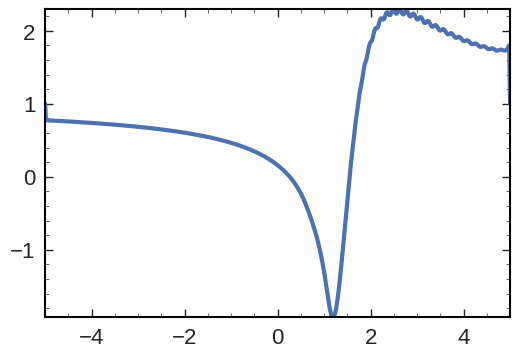

In [49]:
plt.plot(omrange, 1 - chQ_P.XS[0][:, 0])
# plt.plot(omrange, 1 - chQ.XS[0][:, 0])
# plt.axhline(0)

# plt.ylim(-0.2, 0.2)

# plt.xlim(0, 2)

(0.0, 1.5)

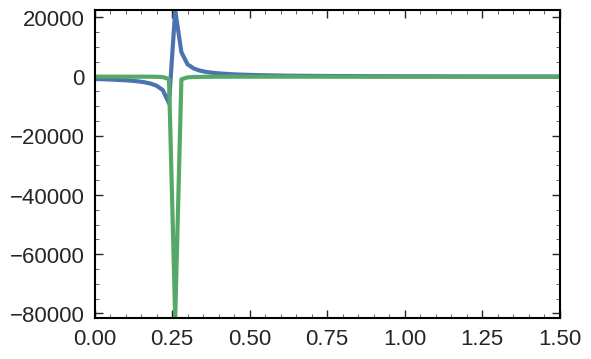

In [50]:
plt.plot(omrange, real(chQ_P.TM[:, 10]))
plt.plot(omrange, imag(chQ_P.TM[:, 10]))
plt.xlim(0, 1.5)

In [55]:
chQ_P.XS[]

IndexError: list index out of range

In [51]:
rp = real(chQ_P.XS[1][:, 0])

iEqX = interp1d(omrange, 1 - rp)

wh = where(np.gradient(rp) < 0)

uplim = omrange[wh[0][-1]]

minimize(lambda z: iEqX(z)**2, .9, bounds=[[0, uplim]])

IndexError: list index out of range

## Extrapolation of the pole position

In [56]:
Grange_P = linspace(1, 20, 25)

In [57]:
mQQ_P = []
mQQ_P_pole = []

for G in tqdm.tqdm_notebook(Grange_P, leave=0):
    _ = chQ_P
    _.set_Gs(G)
    _.L = L
    _.init_iV()
    chQ = chQ_P
    XQ = array([tm.x_solve(o, .1, .1, T, chQ.iVS[0], chQ.iOm, chQ.iReG2, chQ.iImG2, 5, 1) for o in omrange_test])
    vQ = np.sign(chQ.G)*chQ.v(1)**2
    TQ = - 4*np.pi*vQ / (1 - XQ)

    iTQ = interp1d(omrange_test, imag(TQ), kind='cubic')
    
    mQQ = omrange_test[argmin(imag(TQ))]

    mQQ_P += [mQQ]

    i_pole = argmin((1 - real(XQ))**2)
    if abs(1 - real(XQ)[i_pole]) > 1e-1:
        mpole = None
    else:
        mpole = omrange_test[i_pole]
    mQQ_P_pole += [mpole]

  0%|          | 0/25 [00:00<?, ?it/s]

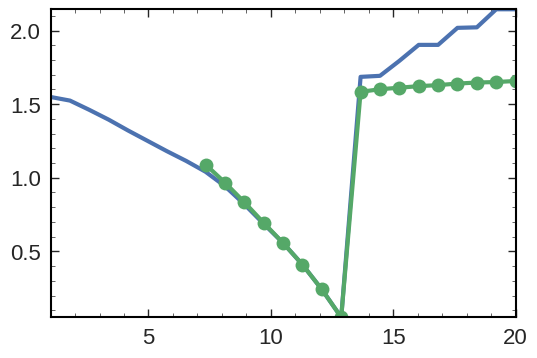

In [60]:
plt.plot(Grange_P, mQQ_P)
plt.plot(Grange_P, mQQ_P_pole, marker='o')
# plt.xlim(10, 15)
# plt.ylim(1.1, 1.3)

In [59]:
mQQ_P_pole

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 1.0895895895895895,
 0.9669669669669669,
 0.8338338338338338,
 0.6936936936936937,
 0.5570570570570571,
 0.4099099099099099,
 0.24174174174174173,
 0.052552552552552555,
 1.5835835835835836,
 1.6011011011011012,
 1.6116116116116117,
 1.622122122122122,
 1.6291291291291292,
 1.6396396396396395,
 1.6466466466466467,
 1.65015015015015,
 1.657157157157157]